# visualise filters and feature maps from CNN 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/


## prefit vgg

In [1]:
from keras.applications.vgg16 import VGG16

In [2]:
model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## visualise filters

block1_conv1 (3, 3, 3, 64)


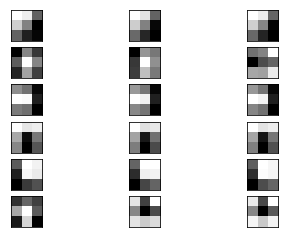

block1_conv2 (3, 3, 64, 64)


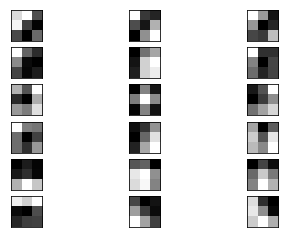

block2_conv1 (3, 3, 64, 128)


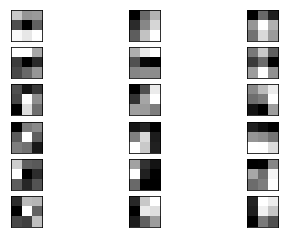

block2_conv2 (3, 3, 128, 128)


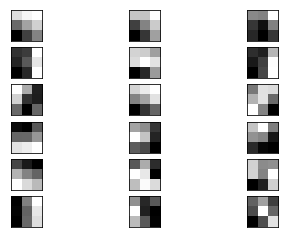

block3_conv1 (3, 3, 128, 256)


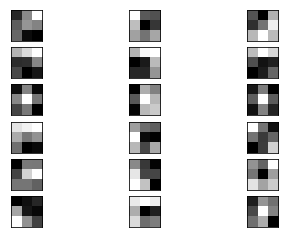

block3_conv2 (3, 3, 256, 256)


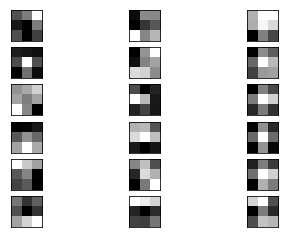

block3_conv3 (3, 3, 256, 256)


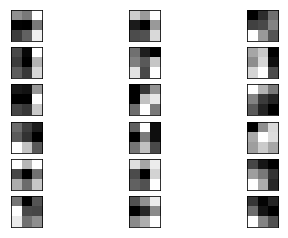

block4_conv1 (3, 3, 256, 512)


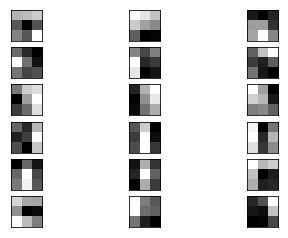

block4_conv2 (3, 3, 512, 512)


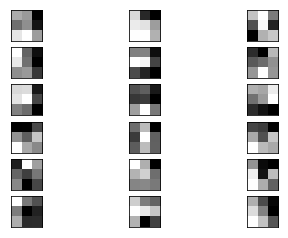

block4_conv3 (3, 3, 512, 512)


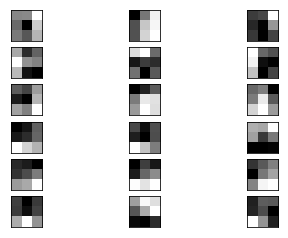

block5_conv1 (3, 3, 512, 512)


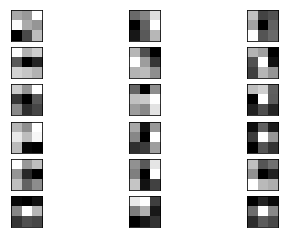

block5_conv2 (3, 3, 512, 512)


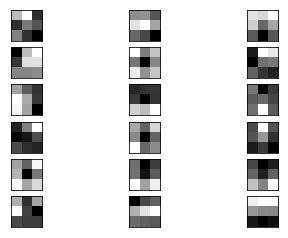

block5_conv3 (3, 3, 512, 512)


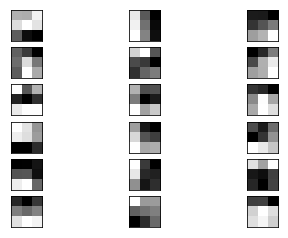

In [8]:
from matplotlib import pyplot
%matplotlib inline 
for layer in model.layers: 
    if 'conv' not in layer.name: 
        continue
    filters, biases = layer.get_weights() 
    print(layer.name, filters.shape)
    # normalise filter values between 0 to 1 
    f_min = filters.min()
    f_max = filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters, ix = 6, 1
    for i in range(n_filters): 
        f = filters[:,:,:, i]
        for j in range(3): 
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(f[:,:,j], cmap='gray')
            ix += 1
    pyplot.show()

## visailise feature maps 

In [9]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [10]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [24]:
# load the image with the required shape
img1 = load_img('/data/home/mutaz/notebooks/mdsi_deeplearn/vis_filters/IMG_1017.JPG', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img1)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

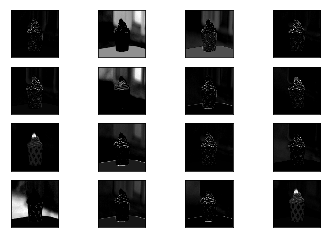

In [25]:
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()


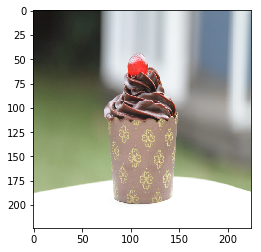

In [27]:
pyplot.imshow(img1)
pyplot.show()